#loading the data

In [269]:
import pandas as pd
df = pd.read_csv('/Housing-1 - Housing-1.csv')
print(df.head())
df.info()
df.isnull().sum()

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


#Processing the data


Mapping categorical features with binary values (yes/no) to a numerical domain of 0 and 1

In [270]:
columns_to_modify = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for col in columns_to_modify:
    df[col] = df[col].map({'yes':1,'no':0})
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


mapping categorical feature 'furnishingstatus' to 2, 1 and 0

In [271]:
df['furnishingstatus'].unique()
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished':2,'semi-furnished':1,'unfurnished':0})
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [272]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


normalizing the area to range from 0 to 1

In [273]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_area = scaler.fit_transform(df['area'].values.reshape(-1, 1))
df['area'] = normalized_area
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,4,2,3,1,0,0,0,1,2,1,2
1,12250000,0.502405,4,4,4,1,0,0,0,1,3,0,2
2,12250000,0.571134,3,2,2,1,0,1,0,0,2,1,1
3,12215000,0.402062,4,2,2,1,0,1,0,1,3,1,2
4,11410000,0.396564,4,1,2,1,1,1,0,1,2,0,2


#splitting the data to train and test

In [288]:
X=df.drop('price',axis=1)
y=df['price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Building the model

In [289]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
class LinearRegression(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)
    def forward(self,x):
        out = self.linear(x)
        return out

#initializing the model and setting the loss and optimizer

In [290]:
X_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

input_size = x_train.shape[1]
output_size = 1
model = LinearRegression(input_size, output_size)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.02)


#Training the model

In [291]:
epochs=100
for epoch in range(epochs):
  for data,target in train_loader:
    output = model.forward(data)
    loss = criterion(output,target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

#Evaluating the model

In [292]:
import matplotlib.pyplot as plt
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)

from sklearn.metrics import r2_score
r2=r2_score(y_test_tensor,y_pred)

print(f'R2 Score: {r2}')


R2 Score: 0.7230229920252265


#Plotting the predicted compared to real values

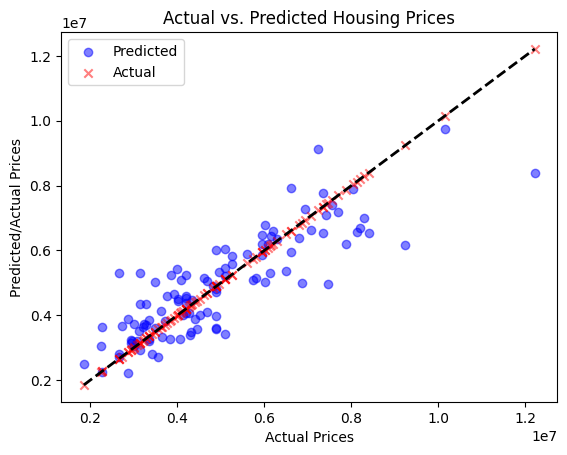

In [293]:
plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted", marker="o", color="blue")
plt.scatter(y_test, y_test, alpha=0.5, label="Actual", marker="x", color="red")  # Add actual values

plt.xlabel("Actual Prices")
plt.ylabel("Predicted/Actual Prices")  # Update y-axis label
plt.title("Actual vs. Predicted Housing Prices")

# Add a diagonal line for reference (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.legend()  # Show legend to distinguish markers
plt.show()

#plotting the residual

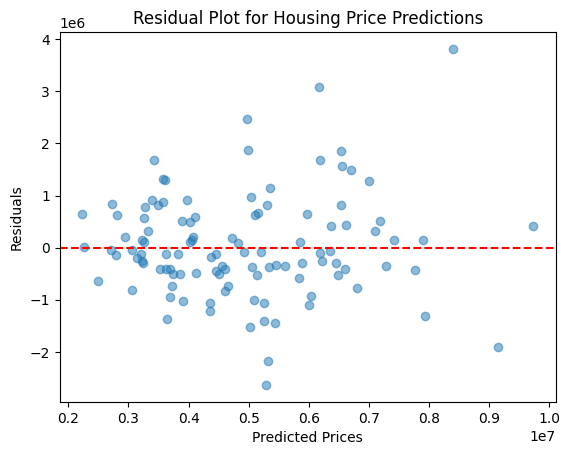

In [294]:
residuals = y_test_tensor - y_pred

# Create a residual plot
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot for Housing Price Predictions")

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='r', linestyle='--')

plt.show()